# Mini-Project: Dementia prediction using SVM

## Problem Statement

Prediction of Dementia using an SVM model on brain MRI features

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement SVM Classifier on the data
* explore various parameters of SVM classifier and implement OneVsOne classifier
* calculate the metrics and plot the roc_curve

## Information

**About Dementia**

Dementia is a general term for loss of memory and other mental abilities severe enough to interfere with daily life. It is caused by physical changes in the brain. Alzheimer's is the most common type of dementia, but there are many kinds.

**Brain Imaging via magnetic resonance imaging (MRI) and Machine Learning**

* MRI is used for the evaluation of patients with suspected Alzheimer's disease
* MRIs detect both, local and generalized shrinkage of brain tissue.
* MRI features predict the rate of decline of AD and may guide therapy in the future
* Using machine learning on MRI features could help in automatedly and accurately predicting the progress of a patient from mild cognitive impairment to dementia

To understand the basics of MRI technique, you could refer [here](https://case.edu/med/neurology/NR/MRI%20Basics.htm)

## Dataset

The dataset chosen for this mini-project is [OASIS - Longitudinal brain MRI Dataset](https://www.oasis-brains.org/). This dataset consists of a longitudinal MRI collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

**Dataset fields:**

* Subject ID - Subject Identification
* MRI ID - MRI Exam Identification
* Group - Target variable with 3 labels ('NonDemented', 'Demented', 'Converted')
* Visit - Visit order
* MR Delay - MR Delay Time (Contrast)
* M/F - Male or Female
* Hand - Unique value 'R'
* MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)
* CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)
* Derived anatomic volumes
* eTIV - Estimated total intracranial volume, mm3
* nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
* ASF - Atlas scaling factor (unitless). A computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

For learning more on building a machine learning model to predict dementia using SVM, refer [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7408873/).

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/oasis_longitudinal.csv
print("Data downloaded successfully!")

Data downloaded successfully!


### Import required packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
# sklearn imports
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math








### Load the dataset

In [ ]:
# YOUR CODE HERE
df = pd.read_csv('/content/oasis_longitudinal.csv')
df. head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
print('The information related to dataset:')
df.info()
print("The description of dataset:")
df.describe()
print("The shape of the dataset:")
df.shape

The information related to dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
The description of dataset:
The shape of the dataset:


(373, 15)

### Pre-processing and Data Engineering

#### Remove unwanted columns

In [ ]:
# YOUR CODE HERE
df = df.drop(['MRI ID',  'Hand'], axis=1) # Drop unnecessary columns
df

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


#### Encode categorical features into numeric

In [ ]:
# YOUR CODE HERE
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,1,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,1,2,560,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,1,3,1895,1,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,1,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,1,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,0,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,0,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


#### Handle the null values by removing or replacing

In [ ]:
# YOUR CODE HERE
df.isnull().sum()

Subject ID     0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

**We identified 12 rows with missing values in SES column and 2 in MMSE. We deal with this issue with 2 approaches. One is just to drop the rows with missing values. The other is to replace the missing values with the corresponing values, also known as 'Imputation'. Since we have small dataset, I assume imputation would help the performance of our model.**

In [ ]:
SES_median = df.groupby(['EDUC'])['SES'].median()
print('SES_med', SES_median)
df['SES'].fillna(df.groupby(['EDUC'])['SES'].transform("median"), inplace=True)

SES_med EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64


In [ ]:
df['MMSE'].fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

Subject ID    0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

**SES: SocioEconomicStatus**
**EDUC: YearofEducation**
**Since the SES is a discrete variable, we use median for the imputation.**

In [ ]:
df['Group'].value_counts()

0    190
1    183
Name: Group, dtype: int64

#### Identify feature and target and split it into train test

In [ ]:
# YOUR CODE HERE
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use
y = df['Group'].values # Target for the model

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_trainval.shape, y_test.shape

((261, 8), (112,))

In [ ]:
# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

### EDA &  Visualization

#### Plot the distribution of all the variables using a histogram

In [ ]:
# YOUR CODE HERE
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked= False, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

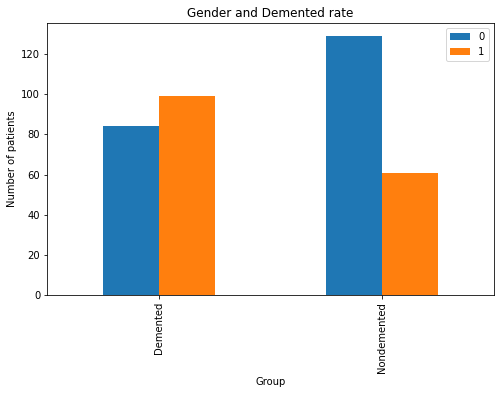

In [ ]:
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

**The graph indicates that men are more likely with dementia than women.**

Text(0.5, 1.0, 'Year of Education and Demented rate')

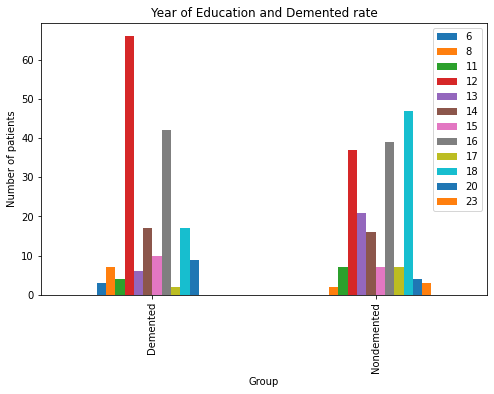

In [ ]:
# Year of Education 'EDUC' 
bar_chart('EDUC')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Year of Education and Demented rate')

**Demented patients were less educated in terms of years of education.**

Text(0.5, 1.0, 'SocioEconomic Sataus and Demented rate')

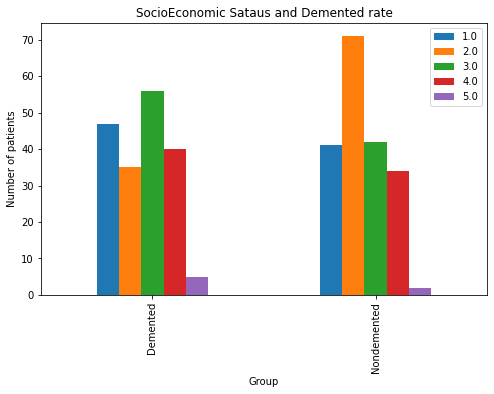

In [ ]:
# SocioEconomic Sataus 'SES' 
bar_chart('SES')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('SocioEconomic Sataus and Demented rate')

**At lowest level of socio economic status there is a highest probability of dementia which may be due to lower economic condition which results in depression, sufferings which in turn results in dementia.**

Text(0.5, 1.0, 'Mini-Mental State Examination score and Demented rate')

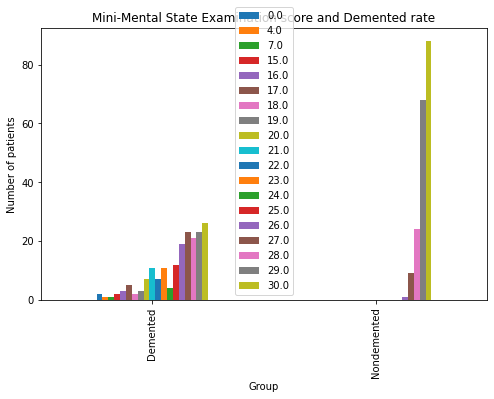

In [ ]:
bar_chart('MMSE')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Mini-Mental State Examination score and Demented rate')

In [ ]:
df['MMSE'].describe()

count    373.000000
mean      27.195710
std        4.182244
min        0.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [ ]:
# Categorizing feature MMSE
def category_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9:
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:                                        # As we have no cases of sever dementia CDR score=3
        return 'Mild'

df['MMSE_new'] = df['MMSE'].apply(lambda x: category_MMSE(x))

#### Visualize the frequency of Age

In [ ]:
df['age_group'] = pd.cut(df['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])
df['age_group'].value_counts()

70-80     173
80-90     107
60-70      75
90-100     16
Name: age_group, dtype: int64

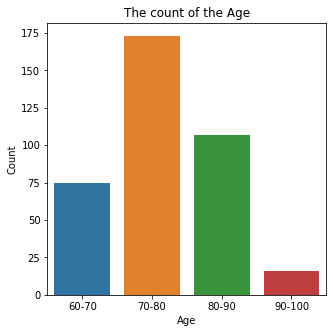

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x="age_group", data = df)
ax.set(xlabel = 'Age')
ax.set(ylabel = 'Count')
ax.set(title ='The count of the Age')
plt.show()

**There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.**

In [ ]:
df['CDR'].describe()

count    373.000000
mean       0.290885
std        0.374557
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        2.000000
Name: CDR, dtype: float64

**CDR™ Scoring Algorithm. This score is useful for characterizing and tracking a patient’s level of impairment/dementia:**

0 = Normal
0.5 = Very Mild Dementia or Questionable
1 = Mild Dementia
2 = Moderate Dementia
3 = Severe Dementia**

Information was taken from The Charles F. and Joanne Knight Alzheimer’s Disease Research Center website.

In [ ]:
# Categorizing feature CDR
def category_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'

df['CDR_new'] = df['CDR'].apply(lambda x: category_CDR(x))

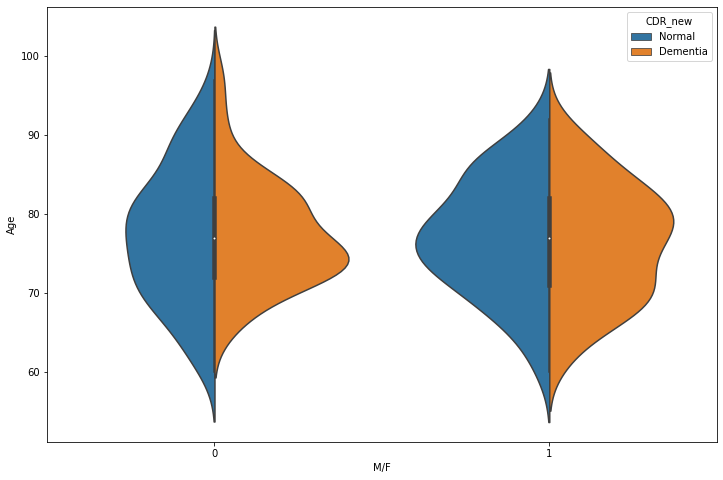

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="Age",hue="CDR_new",split=True, data=df)
plt.show()

**As we can observe from the above plot, in case of Male most number of dementia cases are reported in the age of around 80 years while in case of females dementia is prevalent in 75 years of Age. One more observation suggests that in case of Males dementia starts early even before 60 years of age while in case of females demetia generally after 60 years of age.**

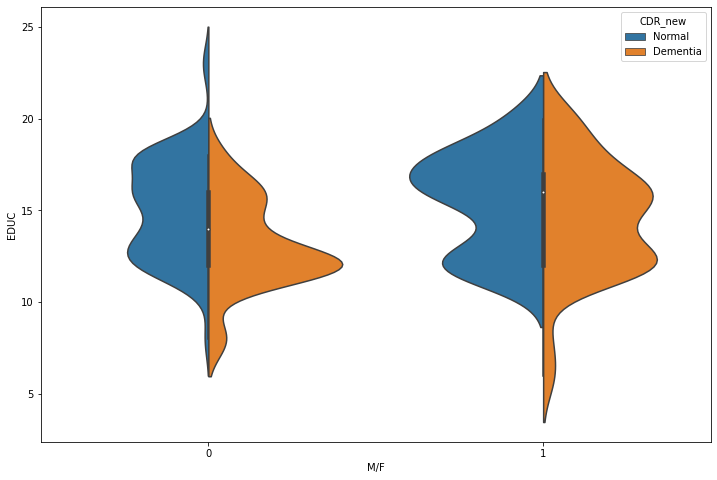

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="EDUC",hue="CDR_new",split=True, data=df)
plt.show()

**We can observe from the above plot,Mens having education level between 10 and 17 have higher level of dementia cases and mens started to show dymentia symptoms with less education levels starting from 4 years whereas females starts showing dymentia symptoms after 6 years of education level having highest peak at 13 years of age.**

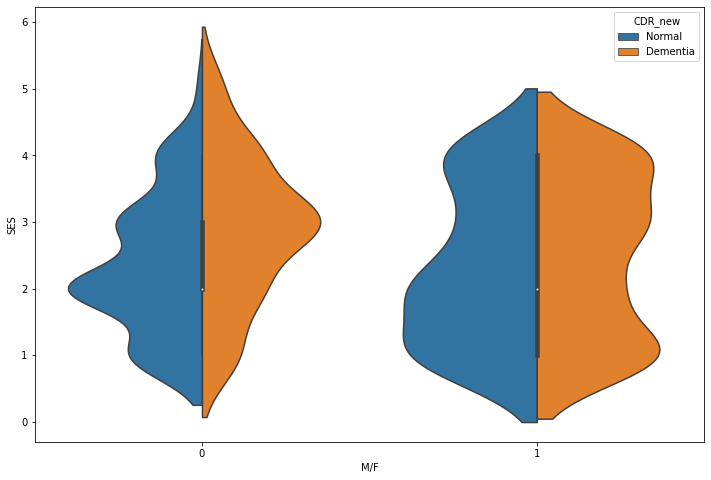

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="SES",hue="CDR_new",split=True, data=df)
plt.show()

**Interesting pattern observed from the above plot that in mens there are two peaks of highest dementia cases one at 1 (Highest status) and 4(lower status) and in between 1 and 4 there less instances of dementia cases whereas in case of females highest peak is at 3 whereas at 1 and 5 there are slightly less dementia cases reported.
It suggests that womens have less dementia probability at extreme higher and extreme lower level of socio economic status while mens have exactly opposite phenomenon.**

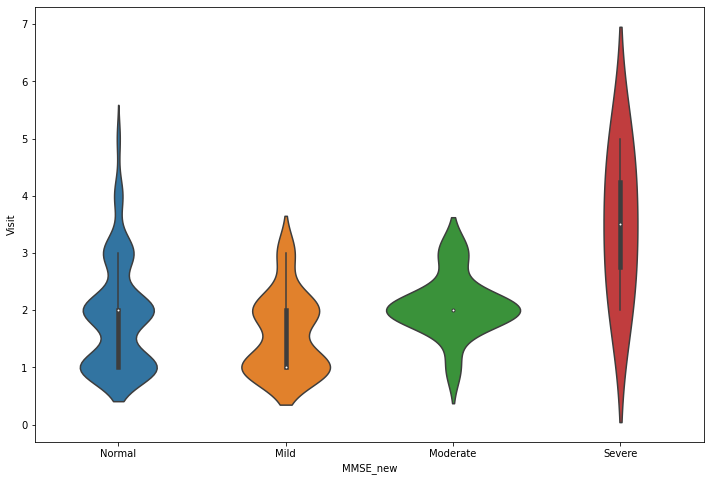

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE_new", y="Visit",split=True, data=df)
plt.show()

**Severe Dementia cases starts reporting as the number of visits increases to more than 3 whereas normal cases are also reported after higher number of visits more than 3 but they are very few in number.**

#### How many people have Alzheimer? Visualize with an appropriate plot

the same person visits two or more times; extract the single visit data and plot

**Hint**: Visit = 1

In [ ]:
# YOUR CODE HERE
#df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
#df = df.reset_index(drop=True) # reset index after filtering first visit data
#df['Visit'].values

In [ ]:
df

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSE_new,age_group,CDR_new
0,OAS2_0001,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,Normal,80-90,Normal
1,OAS2_0001,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,Normal,80-90,Normal
2,OAS2_0002,1,1,0,1,75,12,3.0,23.0,0.5,1678,0.736,1.046,Mild,70-80,Dementia
3,OAS2_0002,1,2,560,1,76,12,3.0,28.0,0.5,1738,0.713,1.010,Normal,70-80,Dementia
4,OAS2_0002,1,3,1895,1,80,12,3.0,22.0,0.5,1698,0.701,1.034,Mild,70-80,Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,1,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037,Normal,80-90,Dementia
369,OAS2_0185,1,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040,Normal,80-90,Dementia
370,OAS2_0186,0,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,Normal,60-70,Normal
371,OAS2_0186,0,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323,Normal,60-70,Normal


Text(0.5, 1.0, 'Visit and Demented rate')

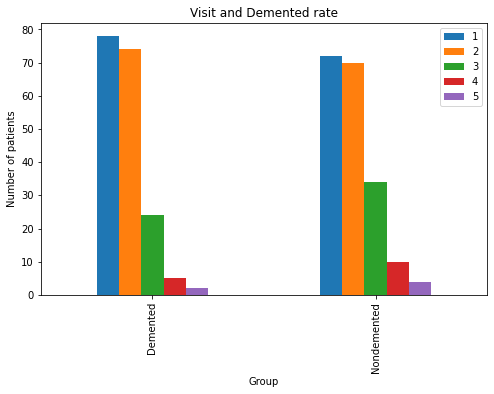

In [ ]:
# YOUR CODE HERE
bar_chart('Visit')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Visit and Demented rate')

#### Calculate the correlation of features and plot the heatmap

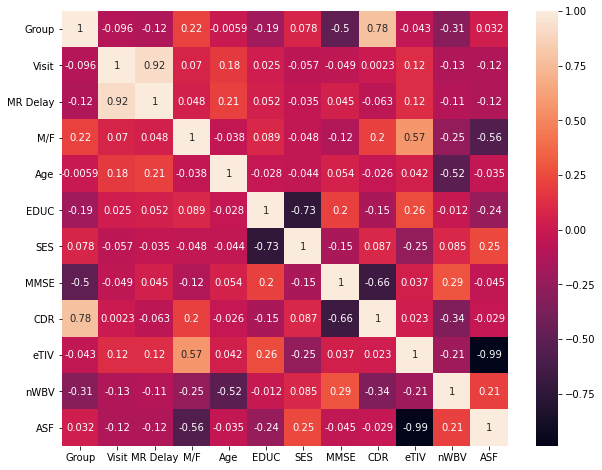

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g")

**As we can see Visit and MR Delay are showing close correlation to 0.92 but for analysis and prediction we are not dropping any correlated variable as of now.**

### Model training and evaluation

**Hint:** SVM model from sklearn

In [ ]:
X = df[['Visit', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use
y = df['Group'].values # Target for the model

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_trainval.shape, y_test.shape

((261, 9), (112,))

In [ ]:
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)
X_trainval_scaled.shape, X_test_scaled.shape

((261, 9), (112, 9))

In [ ]:
# YOUR CODE HERE
from sklearn.svm import SVC, LinearSVC
# kernel = 'linear' is used on data which is separable
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_trainval_scaled, y_trainval)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# YOUR CODE HERE
y_pred = classifier.predict(X_test_scaled)   
print("Predicted values ",y_pred)  

Predicted values  [1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0
 1]


In [ ]:
# confusion matrix between true values and predicted outcomes for first model
cm = confusion_matrix(y_test, y_pred)   
cm

array([[39, 20],
       [19, 34]])

In [ ]:
# calculating the accuracy 
accuracy_score(y_test, y_pred)

0.6517857142857143

In [ ]:
# Make a pipeline of Scaling and SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
print("The Pipeline model")
clf = make_pipeline(LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_trainval_scaled, y_trainval)
y_pred2 = clf.predict(X_test)   
print("Predicted values with pipeline",y_pred2) 
cm = confusion_matrix(y_test, y_pred2)   
print('The confusion matrix for pipeline model\n', cm)
print('The acuracy for pipeline model:', accuracy_score(y_test, y_pred2))

The Pipeline model
Predicted values with pipeline [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
The confusion matrix for pipeline model
 [[ 0 59]
 [ 0 53]]
The acuracy for pipeline model: 0.4732142857142857


In [ ]:
# kernel = 'rbf' is used on data which is separable
classifier1 = SVC(kernel='rbf', random_state=0)  
classifier1.fit(X_trainval_scaled, y_trainval)
y_pred_1 = classifier.predict(X_test_scaled)   
print("Predicted values with pipeline",y_pred_1) 
cm_1 = confusion_matrix(y_test, y_pred_1)   
print('The confusion matrix for pipeline model\n', cm_1)
print('The acuracy for pipeline model:', accuracy_score(y_test, y_pred_1))

Predicted values with pipeline [1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0
 1]
The confusion matrix for pipeline model
 [[39 20]
 [19 34]]
The acuracy for pipeline model: 0.6517857142857143


#### Support vectors of the model

* Find the samples of the dataset which are the support vectors of the model 

In [ ]:
# YOUR CODE HERE (Kernel = Linear)
classifier.support_vectors_

array([[0.25      , 0.        , 0.62162162, ..., 0.44721907, 0.51308901,
        0.40767045],
       [0.25      , 1.        , 0.24324324, ..., 0.45856981, 0.64921466,
        0.39630682],
       [0.        , 1.        , 0.10810811, ..., 0.29057889, 1.        ,
        0.57670455],
       ...,
       [0.25      , 0.        , 0.32432432, ..., 0.39160045, 0.58115183,
        0.46448864],
       [0.25      , 0.        , 0.62162162, ..., 0.32236095, 0.42931937,
        0.53977273],
       [0.25      , 1.        , 0.45945946, ..., 0.52553916, 0.30366492,
        0.33522727]])

In [ ]:

# Kernel = rbf
classifier1.support_vectors_

array([[0.25      , 0.        , 0.62162162, ..., 0.44721907, 0.51308901,
        0.40767045],
       [0.25      , 1.        , 0.24324324, ..., 0.45856981, 0.64921466,
        0.39630682],
       [0.25      , 0.        , 0.51351351, ..., 0.54483541, 0.58115183,
        0.31818182],
       ...,
       [0.25      , 0.        , 0.32432432, ..., 0.39160045, 0.58115183,
        0.46448864],
       [0.25      , 0.        , 0.62162162, ..., 0.32236095, 0.42931937,
        0.53977273],
       [0.25      , 1.        , 0.45945946, ..., 0.52553916, 0.30366492,
        0.33522727]])

#### Confusion matrix for multi-class classification

* Predict the test and plot the confusion matrix

#### One VS Rest Classifier

OneVsRestClassifier can also be used for multilabel classification. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed)

* Fit `OneVsRestClassifier` on the data and find the accuracy

Hint: [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

In [ ]:
# YOUR CODE HERE
from sklearn.multiclass import OneVsRestClassifier
clf1 = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_trainval_scaled, y_trainval)
y_pred_onevsrest = clf1.predict(X_test_scaled)
print("Predicted values with One vs Rest",y_pred_onevsrest) 
cm1 = confusion_matrix(y_test, y_pred_onevsrest)   
print('The confusion matrix for One vs Rest model\n', cm1)
print('The acuracy for One vs Rest model:', accuracy_score(y_test, y_pred_onevsrest)) 

Predicted values with One vs Rest [1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0
 0]
The confusion matrix for One vs Rest model
 [[40 19]
 [16 37]]
The acuracy for One vs Rest model: 0.6875


#### One VS One Classifier

This strategy consists of fitting one classifier per class pair. At prediction time, the class which received the most votes is selected.

* Fit `OneVsOneClassifier` on the data and find the accuracy

Hint: [OneVsOneClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)

In [ ]:
# YOUR CODE HERE
from sklearn.multiclass import OneVsOneClassifier
clf2 = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_trainval_scaled, y_trainval)
y_pred_onevsone = clf2.predict(X_test_scaled)
print("Predicted values with One vs One",y_pred_onevsone) 
cm2 = confusion_matrix(y_test, y_pred_onevsone)   
print('The confusion matrix for One vs One model\n', cm2)
print('The acuracy for One vs One model:', accuracy_score(y_test, y_pred_onevsone))

Predicted values with One vs One [1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0
 0]
The confusion matrix for One vs One model
 [[40 19]
 [16 37]]
The acuracy for One vs One model: 0.6875


#### Make it binary classification

As stated in the dataset description, 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit. Change `Converted` label into `Demented`.

**Note:** In two-class classification, encode the labels into numerical to plot the roc_curve with predictions.

In [ ]:
df

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSE_new,age_group,CDR_new
0,OAS2_0001,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,Normal,80-90,Normal
1,OAS2_0001,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,Normal,80-90,Normal
2,OAS2_0002,1,1,0,1,75,12,3.0,23.0,0.5,1678,0.736,1.046,Mild,70-80,Dementia
3,OAS2_0002,1,2,560,1,76,12,3.0,28.0,0.5,1738,0.713,1.010,Normal,70-80,Dementia
4,OAS2_0002,1,3,1895,1,80,12,3.0,22.0,0.5,1698,0.701,1.034,Mild,70-80,Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,1,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037,Normal,80-90,Dementia
369,OAS2_0185,1,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040,Normal,80-90,Dementia
370,OAS2_0186,0,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,Normal,60-70,Normal
371,OAS2_0186,0,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323,Normal,60-70,Normal


In [ ]:
# YOUR CODE HERE
from sklearn.metrics import roc_curve
#y1 = df['Group'].apply(lambda x : 1 if x == 'Demented' else 0)
y1 = df['Group'].values # Target for the model
X1 = df[['Visit', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

X_train_val, X_test1, y_train_val, y_test2 = train_test_split(X1, y1, test_size = 0.3, random_state=0)
X_train_scaled = scaler.transform(X_train_val)
X_test1_scaled = scaler.transform(X_test1)
X_train_scaled.shape, y_test.shape
model2 = SVC(C = 0.011, kernel = 'linear', probability= True)
model2.fit(X_train_scaled, y_train_val)
y_2 = model2.predict(X_test)

print("Predicted values with One vs One",y_2) 
cm2 = confusion_matrix(y_test2, y_2)   
print('The confusion matrix for One vs One model\n', cm2)
print('The acuracy for One vs One model:', accuracy_score(y_test2, y_2))

Predicted values with One vs One [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
The confusion matrix for One vs One model
 [[59  0]
 [53  0]]
The acuracy for One vs One model: 0.5267857142857143


#### Compare the performance and predictions of both multi-class and binary classifications

In [ ]:
# YOUR CODE HERE

### Classification report and metrics

#### Confusion matrix

Describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [ ]:
# YOUR CODE HERE

#### Plot the ROC Curve

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

In [ ]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [ ]:
# YOUR CODE HERE
def report_performance(model):

    model_test = model.predict(X_test_scaled)
    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

total_fpr = {}
total_tpr = {}
def roc_curves(model):
    predictions_test = model.predict(X_test_scaled)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test_scaled)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

For Linear SVC


Confusion Matrix:
[[39 20]
 [19 34]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.66      0.67        59
           1       0.63      0.64      0.64        53

    accuracy                           0.65       112
   macro avg       0.65      0.65      0.65       112
weighted avg       0.65      0.65      0.65       112



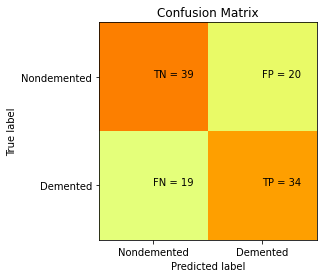

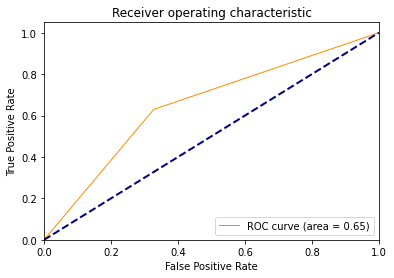


Acuuracy Of the Model:  0.6517857142857143 




In [ ]:
print("For Linear SVC")
report_performance(classifier) 
roc_curves(classifier)
accuracy(classifier)

For rbf


Confusion Matrix:
[[40 19]
 [13 40]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        59
           1       0.68      0.75      0.71        53

    accuracy                           0.71       112
   macro avg       0.72      0.72      0.71       112
weighted avg       0.72      0.71      0.71       112



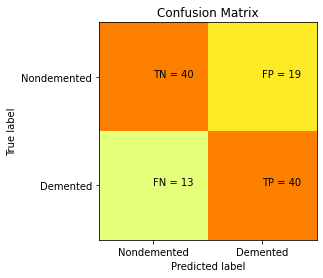

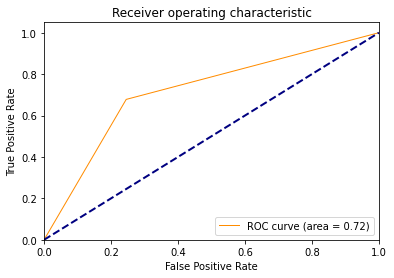


Acuuracy Of the Model:  0.7142857142857143 




In [ ]:
print("For rbf")
report_performance(classifier1) 
roc_curves(classifier1)
accuracy(classifier1)

For Multiclass


Confusion Matrix:
[[59  0]
 [53  0]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        59
           1       0.00      0.00      0.00        53

    accuracy                           0.53       112
   macro avg       0.26      0.50      0.35       112
weighted avg       0.28      0.53      0.36       112



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


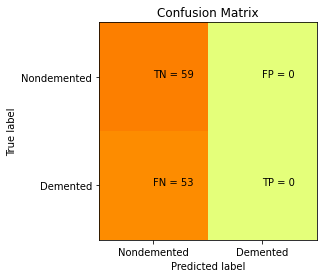

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


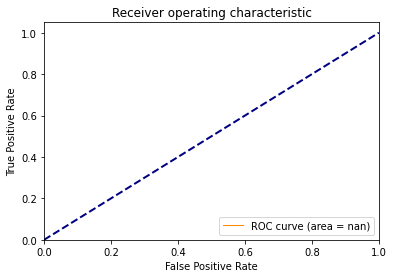


Acuuracy Of the Model:  0.5267857142857143 




In [ ]:
print("For Multiclass")
report_performance(model2) 
roc_curves(model2)
accuracy(model2)

### Choice of C for SVM

experiment with different C values given and plot the ROC curve for each

In [ ]:
acc = [] # list to store all performance metric

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
c_val = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# YOUR CODE HERE
# Dataset with imputation
best_score = 0
kfolds=5 # set the number of folds

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, y_trainval, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter
 # rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, y_trainval)

test_score = SelectedSVMmodel.score(X_test_scaled, y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])               

Best accuracy on cross validation set is: 0.8121915820029028
Best parameter for c is:  0.001
Best parameter for gamma is:  10
Best parameter for kernel is:  poly
Test accuracy with the best parameters is 0.7678571428571429
Test recall with the best parameters is 0.7735849056603774
Test recall with the best parameter is 0.7681483850335785


### Report Analysis

* Compare the performance of the model with various Kernel parameters.
* Discuss the impact of parameter C and gamma on performance.
* Comment on the computational cost of implementing one vs one and one vs all to solve multi-class classification with binary classifier.
* When do you call a sample/record in the data as a support vector?